In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import warnings 
warnings.filterwarnings('ignore')

## Import Data

In [6]:
df = pd.read_csv("Mall_Customers.csv")

In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

## Univariate Analysis

In [13]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


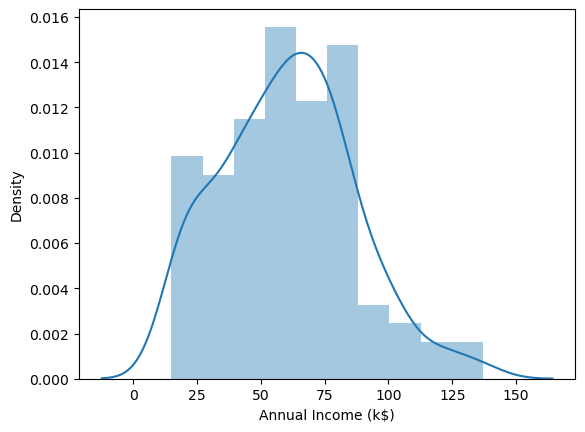

In [15]:
sns.distplot(df['Annual Income (k$)']);

In [17]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

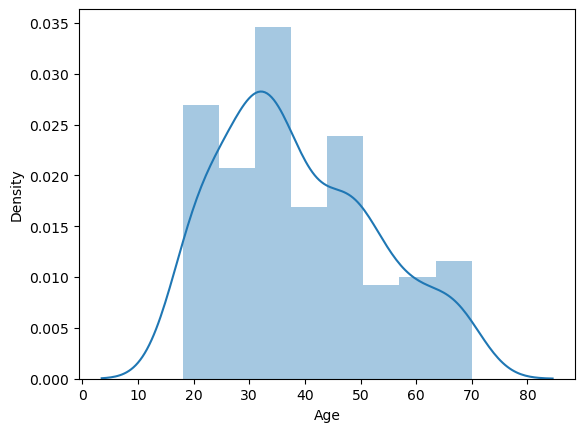

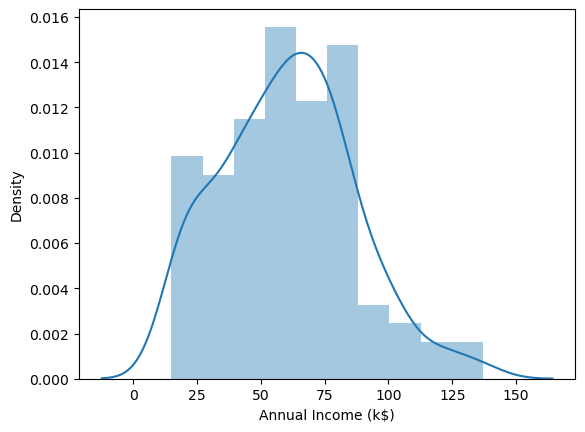

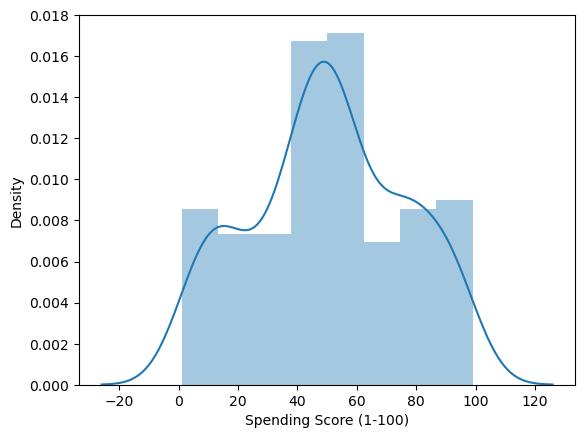

In [19]:
columns = [ 'Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns: 
    plt.figure()
    sns.distplot(df[i])

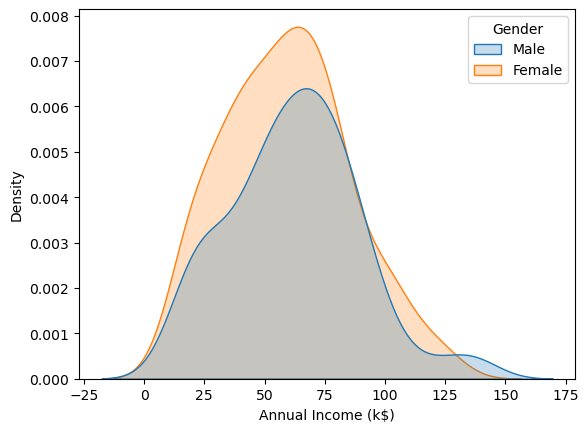

In [21]:
sns.kdeplot(data=df, x='Annual Income (k$)', hue='Gender', fill=True)

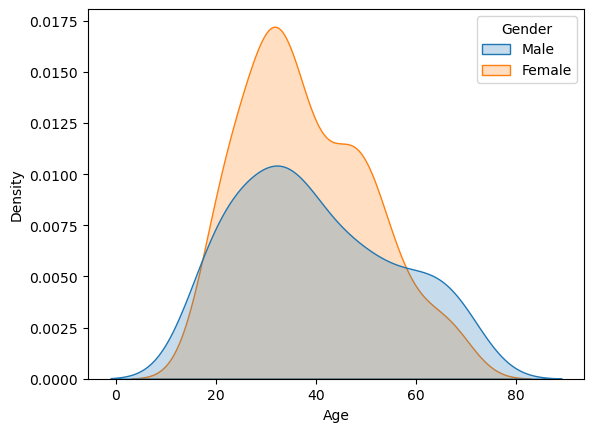

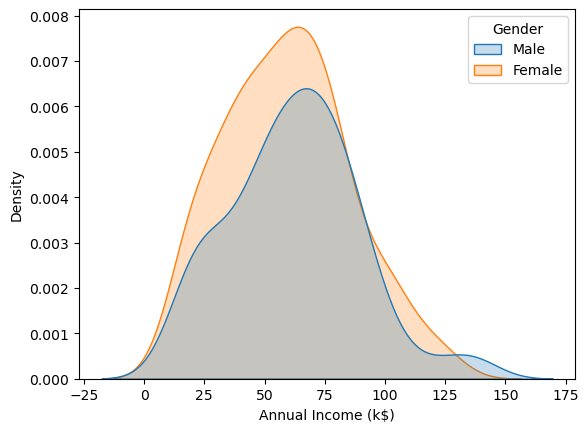

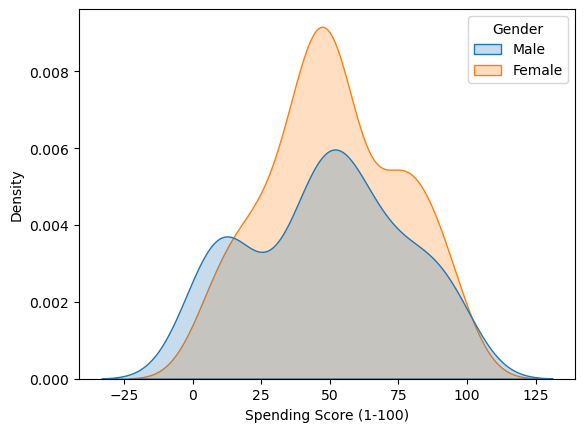

In [23]:
columns = [ 'Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns: 
    plt.figure()
    sns.kdeplot(data=df, x=i, hue='Gender', fill=True)

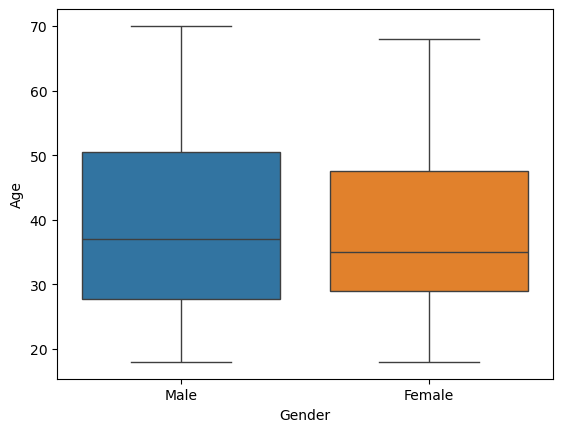

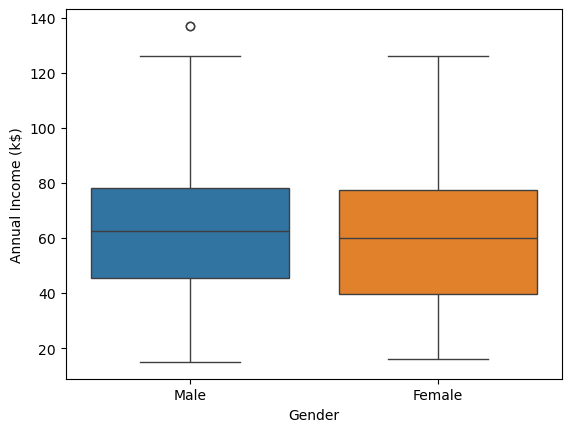

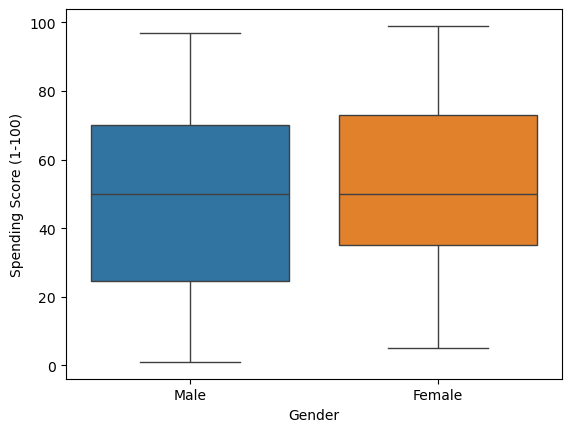

In [25]:
columns = [ 'Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns: 
    plt.figure()
    sns.boxplot(data=df, x='Gender', y= df[i], hue='Gender')

In [27]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [29]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

## Bivariate Analysis

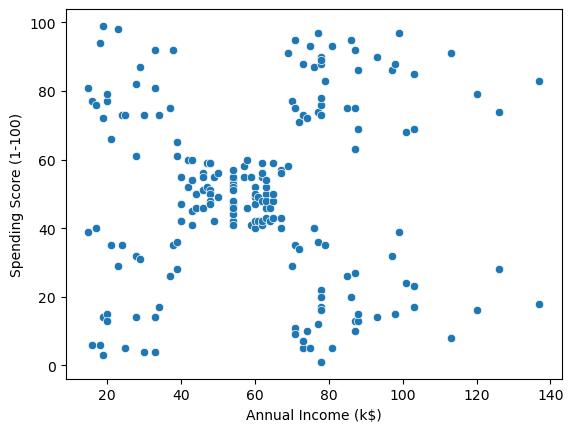

In [32]:
sns.scatterplot(data=df, x= 'Annual Income (k$)', y = 'Spending Score (1-100)')
plt.savefig('Anual Income scatter6.png')

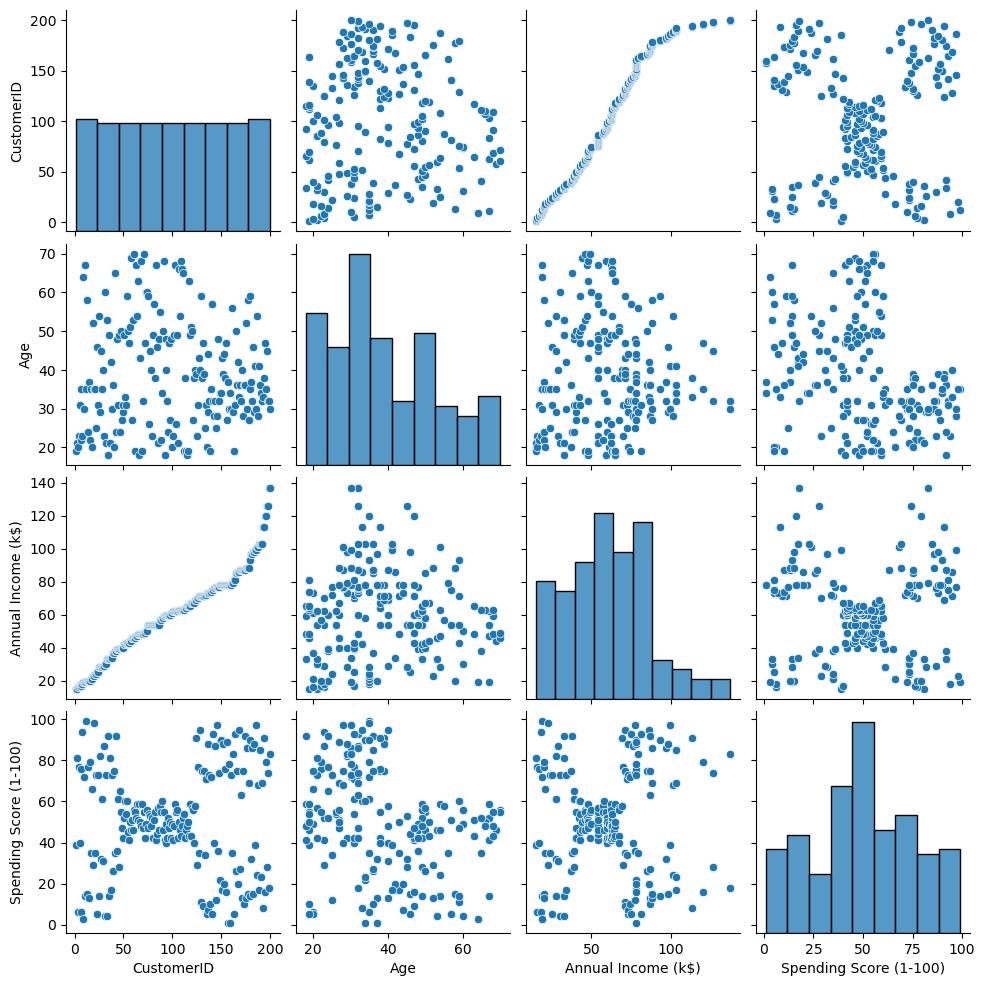

In [34]:
sns.pairplot(df)

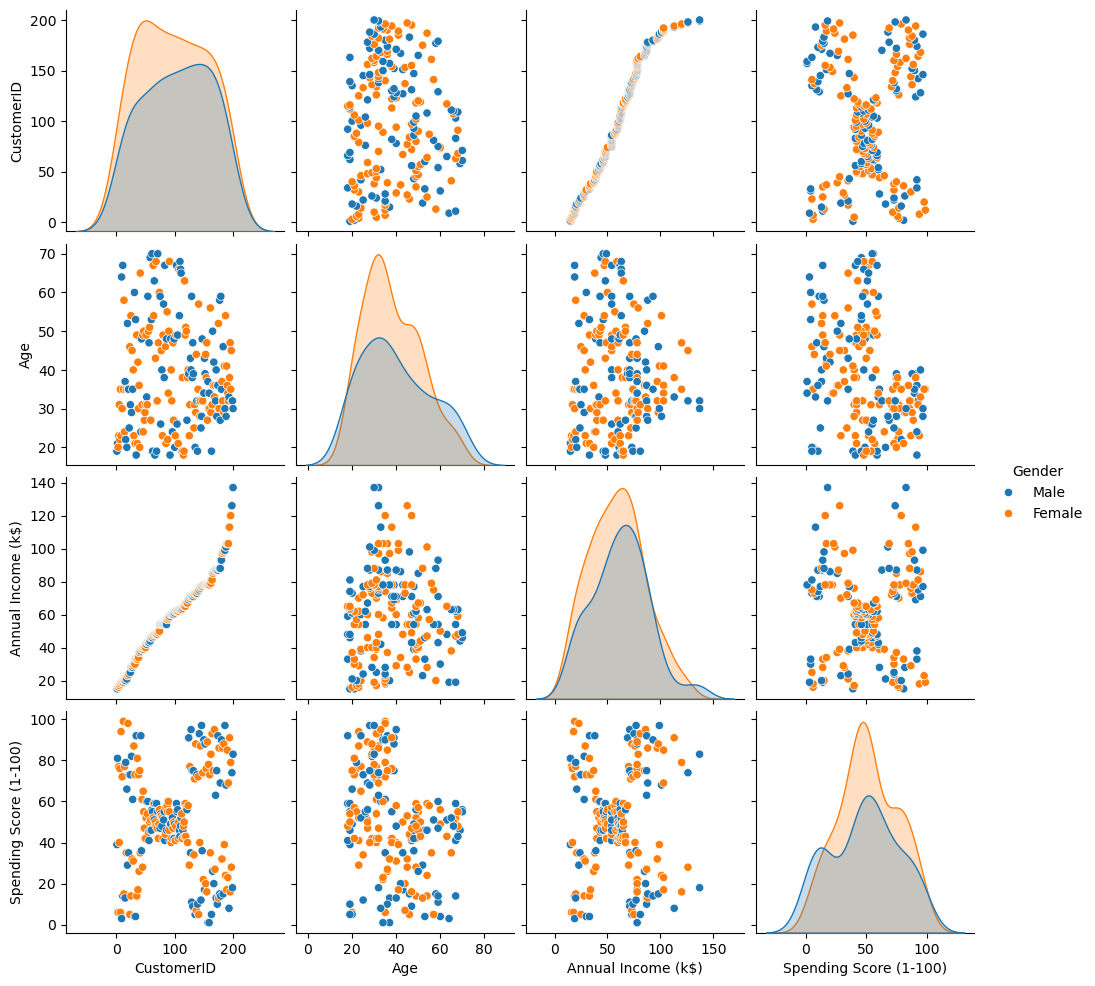

In [36]:
#df=df.drop('CustomerID', axis=1 )
sns.pairplot(df, hue='Gender')

In [120]:
df.groupby('Gender')[[ 'Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [40]:
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


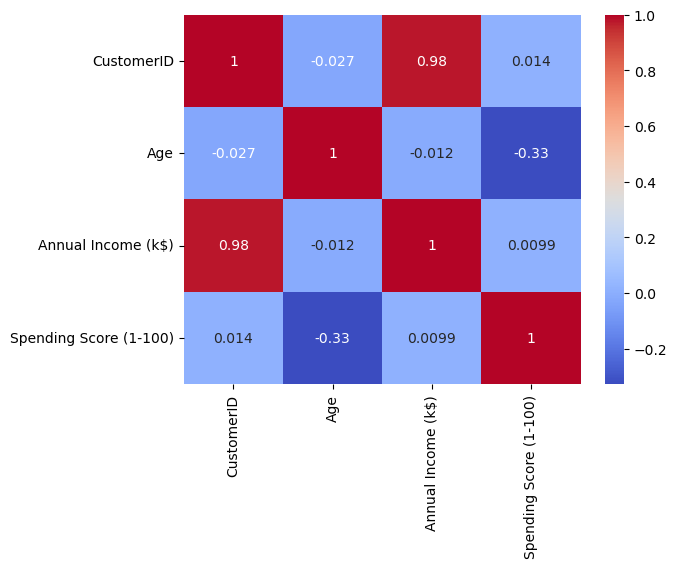

In [42]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.show()

## Clustering - Univariate, Bivariate and Multivariate 

In [45]:
clustering1 = KMeans(n_clusters=3)

In [47]:
clustering1.fit(df[['Annual Income (k$)']])	

KMeans(n_clusters=3)

In [49]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [51]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [53]:
df['Income Cluster'].value_counts()

Income Cluster
2    86
0    58
1    56
Name: count, dtype: int64

In [55]:
clustering1.inertia_

25640.457784396833

In [57]:
inertia_scores=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

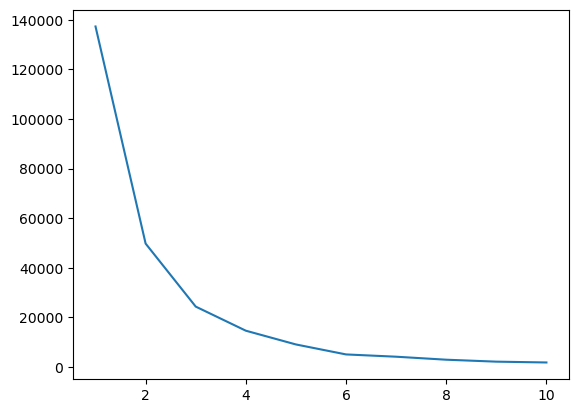

In [59]:
# Elbow Method, Elbow starts at 3. Passing 3 as the n_clusters value in line 77
plt.plot(range(1,11),inertia_scores)

In [61]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [63]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,37.120690,29.551724,49.689655
1,36.910714,92.142857,50.517857
2,41.279070,60.906977,50.337209


In [65]:
#Bivariate Clustering

In [67]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,0
1,2,Male,21,15,81,0,2
2,3,Female,20,16,6,0,0
3,4,Female,23,16,77,0,2
4,5,Female,31,17,40,0,0


In [69]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['X','Y']

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

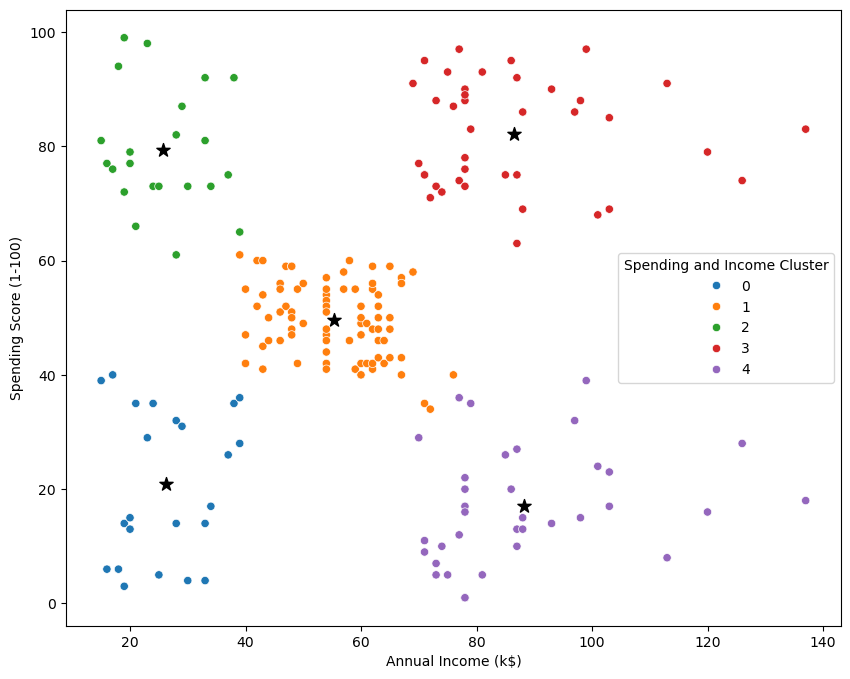

In [71]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['X'], y=centers['Y'], s=100, c='black',marker='*')
sns.scatterplot(data=df, x = 'Annual Income (k$)', y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')

In [73]:
pd.crosstab(df['Spending and Income Cluster'], df['Gender'])

Gender,Female,Male
Spending and Income Cluster,,
0,14,9
1,48,33
2,13,9
3,21,18
4,16,19


In [75]:
pd.crosstab(df['Spending and Income Cluster'], df['Gender'], normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.608696,0.391304
1,0.592593,0.407407
2,0.590909,0.409091
3,0.538462,0.461538
4,0.457143,0.542857


In [122]:
## Takeaway - Cluster 3 has the highest Annual Income vs Spending score, and is comprised mostly of Females

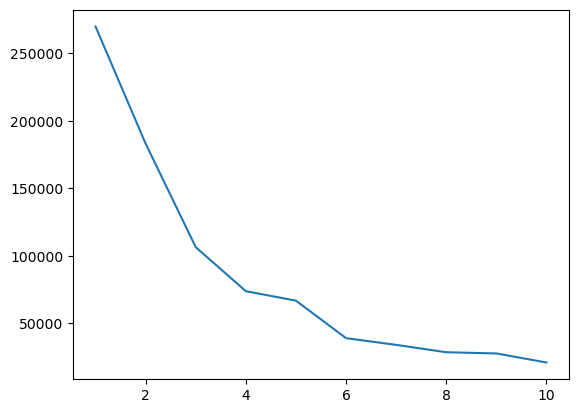

In [80]:
# Elbow sits at 5, updating cluster to 5
inertia_scores2=[]
for i in range (1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),inertia_scores2)

In [82]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,45.217391,26.304348,20.913043
1,42.716049,55.296296,49.518519
2,25.272727,25.727273,79.363636
3,32.692308,86.538462,82.128205
4,41.114286,88.200000,17.114286


In [84]:
#Multivariate Clustering
from sklearn.preprocessing import StandardScaler

In [86]:
scale = StandardScaler()

In [88]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,0
1,2,Male,21,15,81,0,2
2,3,Female,20,16,6,0,0
3,4,Female,23,16,77,0,2
4,5,Female,31,17,40,0,0


In [90]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,0,0,True
1,2,21,15,81,0,2,True
2,3,20,16,6,0,0,False
3,4,23,16,77,0,2,False
4,5,31,17,40,0,0,False


In [92]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [94]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [96]:
dff = scale.fit_transform(dff)

In [98]:
dff

array([[-1.42456879, -1.73899919, -0.43480148,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002, -0.88640526],
       [ 2.02023231, -1.58632148, -1.4053405 ,  1.12815215],
       [-0.27630176, -1.58632148,  1.89449216, -0.88640526],
       [ 1.37433211, -1.54815205, -1.36651894, -0.88640526],
       [-1.06573534, -1.54815205,  1.04041783, -0.88640526],
       [-0.13276838, -1.54815205, -1.44416206,  1.12815215],
       [-1.20926872, -1.54815205,  1.11806095,  1.12815215],
       [-0.27630176, -1.

In [100]:
dff = pd.DataFrame(scale.fit_transform(dff))

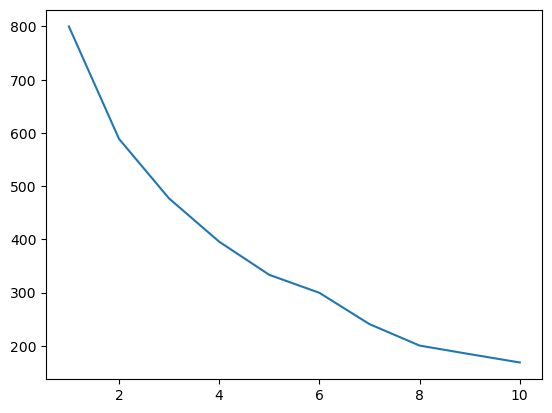

In [102]:
inertia_scores3=[]
for i in range (1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),inertia_scores3)

In [103]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,0
1,2,Male,21,15,81,0,2
2,3,Female,20,16,6,0,0
3,4,Female,23,16,77,0,2
4,5,Female,31,17,40,0,0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,3
196,197,Female,45,126,28,1,4
197,198,Male,32,126,74,1,3
198,199,Male,32,137,18,1,4


In [114]:
df.to_csv('Clustering.csv')